In [1]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data_dir = '../ml_data/'
img_dir = '../images/'

# 簡單線性模型

In [40]:
#1. load Data
D = np.loadtxt(data_dir+'/la_3.txt',comments='%')

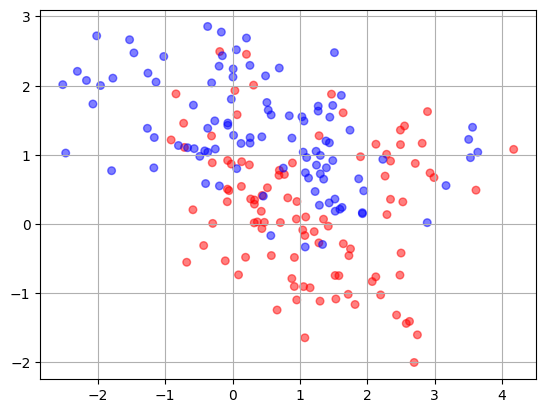

In [41]:
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = [’red’ if i == 0 else ’blue’ for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
plt.grid(True)
# plt.savefig(img_dir+"scatter_reg.pdf", format='pdf')
plt.show()


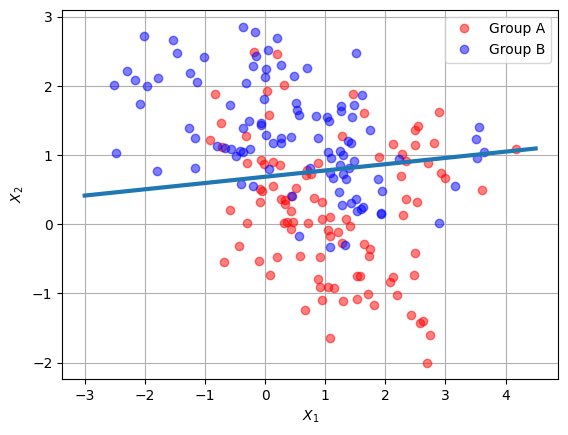

In [42]:
Idx = (D[:,2]==0)
plt.plot(D[Idx, 0], D[Idx, 1], 'ro',\
    alpha = 0.5, label = 'Group A')
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],'bo', \
    alpha = 0.5, label = 'Group B')
n = len(D[:, 0])
X = np.hstack((np.ones((n, 1)), D[:, 0:2]))
y = D[:, 2]
b = LA.inv(X.T @ X) @ X.T @ y.T
x = np.array([-3, 4.5])
y = -(b[0] - 0.5 + b[1] * x) / b[2]
plt.plot(x, y, lw=3)
plt.legend(), plt.grid(True)
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
# plt.savefig("scatter_reg_line.pdf")
plt.show()

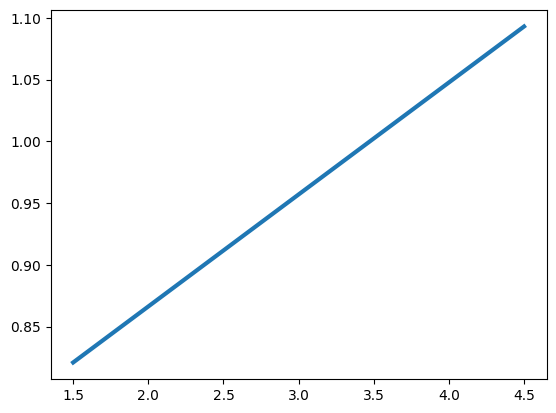

In [43]:
# 3. Estimate the coefficients
n = len(D[:, 0])
X = np.hstack((np.ones((n, 1)), D[:, 0:2]))
y = D[:, 2]
b = LA.inv(X.T @ X) @ X.T @ y.T
x = np.array([1.5, 4.5])
y = -(b[0] - 0.5 + b[1] * x) / b[2]
plt.plot(x, y, lw=3)
plt.show()

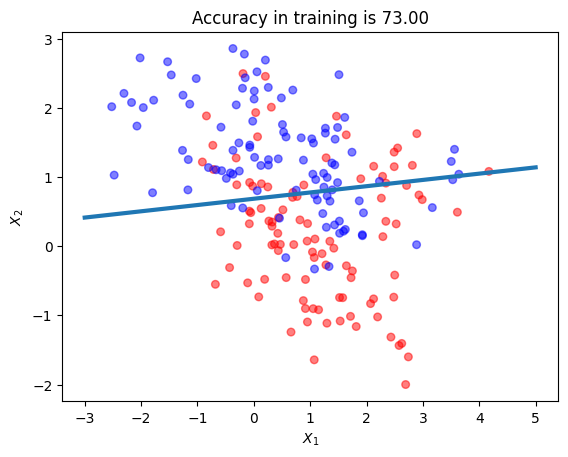

In [44]:
from sklearn.linear_model import LinearRegression
# Linear Regression by sklearn
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = [’red’ if i == 0 else ’blue’ for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
X = D[:, 0:2]
y = D[:, 2]
Mdl = LinearRegression()# 建 立 新 的 linear regression model 
Mdl.fit(X, y) # 進行估計 ( 配適 )
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估 計 結 果 :beta0
coeffs = Mdl.coef_ # # 估 計 結 果 :beta1, beta2, ...
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀
plt.title("Accuracy in training is {:.2f}".format( \
        100 * np.mean(y_pre == y)))
# plt.title("Accuracy in training is {:.2f}".format( \
#         100 * (1-np.mean(y_pre == y))))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
# plt.savefig(img_dir+"simple_regression.pdf", format='pdf')
plt.show()

# 增廣線性模型

Accuracy in training is 72.50


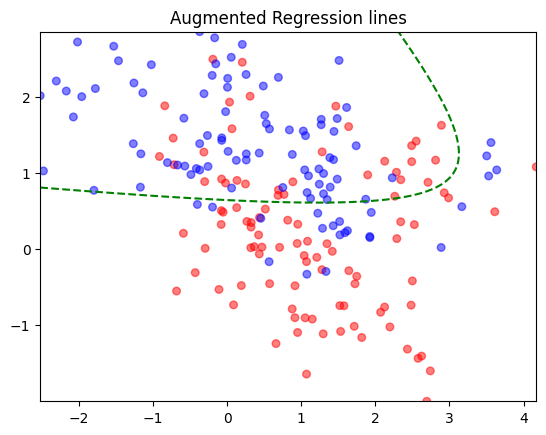

In [45]:
# Augmented regression line by a contour line at 0.5
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1 # colors = D[:,2]
# colors = [’red’ if i == 0 else ’blue’ for i in D[:,2]] 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2]
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_

y_hat = Mdl.predict(X)
y_pre = [1 if i > 0.5 else 0 for i in y_hat]
print('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
#------plot------
b = LA.pinv(X) @ y # pseudo inverse
f = (lambda x: intrcp
    + coeffs[0] * x[0]
    + coeffs[1] * x[1]
    + coeffs[2] * x[0] * x[1]
    + coeffs[3] * x[0] ** 2
    + coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X, Y = np.meshgrid(xx, yy) #網格點
Z = f([X, Y])
contours = plt.contour(X, Y, Z, levels = [0.5], colors='g', linestyles='--') #level拿掉會是等高線圖
# plt.wireframe(X, Y, Z,color ='blue',
#     alpha=0.3, rstride = 1, cstride = 1)
plt.title('Augmented Regression lines')
plt.show()

# 雙變量常態資料模擬

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
def GenDataforTwo(n1,n2,mu1,mu2,Cov1,Cov2):
    mvn1 = multivariate_normal(mean=mu1, cov=Cov1)
    mvn2 = multivariate_normal(mean=mu2, cov=Cov2)
    A, B = mvn1.rvs(n1), mvn2.rvs(n2)
    X = np.vstack((A, B))
    y = np.hstack((np.zeros(n1), np.ones(n2)))
    return X, y

# 實驗一 相同資料量 離很遠

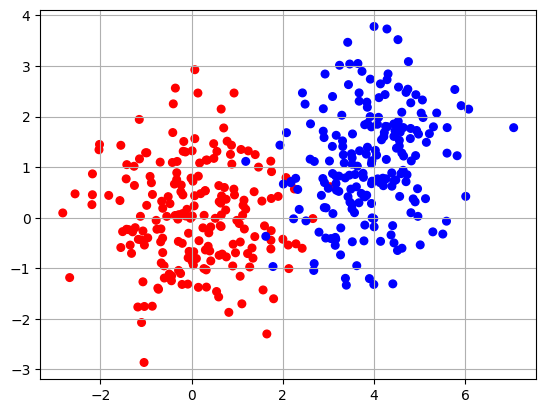

[[ 0.60754161  0.31802241  0.        ]
 [ 0.30096417  0.53136808  0.        ]
 [-2.82337377  0.09437172  0.        ]
 ...
 [ 2.84849161  0.44220776  1.        ]
 [ 5.29228104 -0.27990746  1.        ]
 [ 2.91562251  0.69447665  1.        ]]


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('demo_data1.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()
print(np.c_[X, y])

In [48]:
D1 = np.loadtxt(data_dir+'/demo_data1.txt',comments='#')

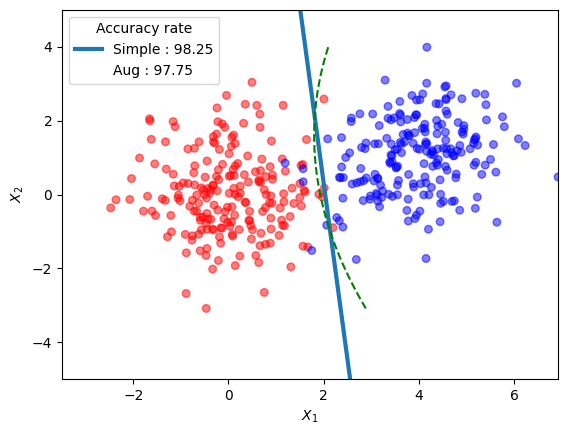

In [54]:
s = 30 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D1[:,2]]
plt.scatter(D1[:, 0], D1[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
X = D1[:, 0:2]
y = D1[:, 2]
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat = Mdl.predict(X)
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
accuracy = np.mean(y_pre == y) * 100
plt.plot(x, f, lw=3,label='Simple : {:.2f}'.format(accuracy))

# plo = plt.plot(x, f, lw=3,alpha=0.8)
# con,_=contours.legend_elements()


x1 = D1[:, 0:1] 
x2 = D1[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
f2 = (lambda x: intrcp
    + coeffs[0] * x[0]
    + coeffs[1] * x[1]
    + coeffs[2] * x[0] * x[1]
    + coeffs[3] * x[0] ** 2
    + coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X1, Y1 = np.meshgrid(xx, yy) #網格點
Z = f2([X1, Y1])
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀

contours = plt.contour(X1, Y1, Z, levels = [0.5], colors='g', linestyles='--')
contours.collections[0].set_label((\
        'Aug : {:.2f}'.format(100 * np.mean(y_pre == y))))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.ylim(-5,5)
plt.legend(title = "Accuracy rate")
# plt.grid(True)
# plt.legend([plo[0],con[0]],['{:.3f}'.format(np.mean(y_pre == y))
#             ,'{:.3f}'.format( np.mean(y_pre == y))],loc='upper left',framealpha=1,title='Accuracy in training')
# plt.savefig(img_dir+"reg_experiment1.pdf", format='pdf')
plt.show()

# 實驗二 相同資料量 離很近

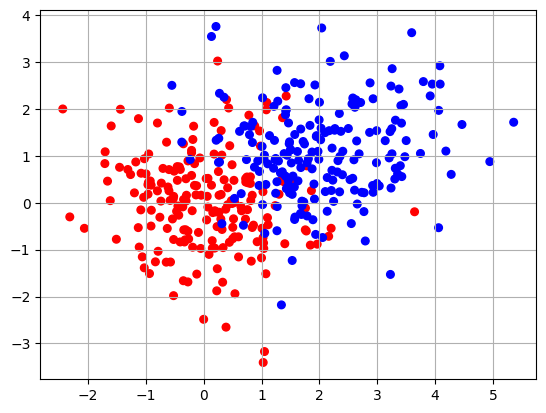

In [50]:
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('demo_data2.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

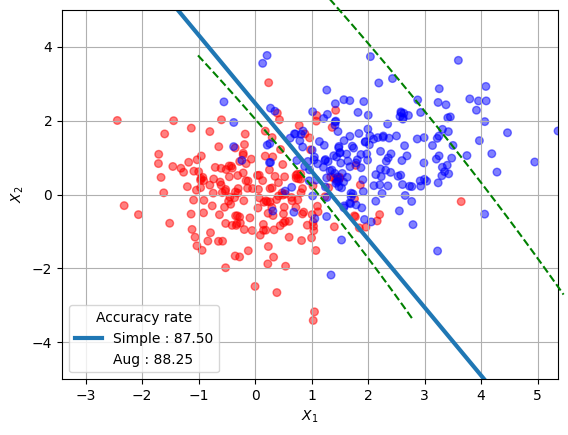

In [56]:
D2 = np.loadtxt(data_dir+'/demo_data2.txt',comments='#')
s = 30 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D2[:,2]]
plt.scatter(D2[:, 0], D2[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
X = D2[:, 0:2]
y = D2[:, 2]
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat = Mdl.predict(X)
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
accuracy = np.mean(y_pre == y) * 100
plt.plot(x, f, lw=3,label='Simple : {:.2f}'.format(accuracy))

# plo = plt.plot(x, f, lw=3,alpha=0.8)
# con,_=contours.legend_elements()

x1 = D2[:, 0:1] 
x2 = D2[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
f2 = (lambda x: intrcp
    + coeffs[0] * x[0]
    + coeffs[1] * x[1]
    + coeffs[2] * x[0] * x[1]
    + coeffs[3] * x[0] ** 2
    + coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X1, Y1 = np.meshgrid(xx, yy) #網格點
Z = f2([X1, Y1])
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀

contours = plt.contour(X1, Y1, Z, levels = [0.5], colors='g', linestyles='--')
contours.collections[0].set_label((\
        'Aug : {:.2f}'.format(100 * np.mean(y_pre == y))))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.ylim(-5,5)
plt.legend(title = "Accuracy rate")
plt.grid(True)
# plt.legend([plo[0],con[0]],['{:.3f}'.format(np.mean(y_pre == y))
#             ,'{:.3f}'.format( np.mean(y_pre == y))],loc='upper left',framealpha=1,title='Accuracy in training')
# plt.savefig("reg_experiment2.pdf")
# files.download("reg_experiment2.pdf")
plt.show()

# 實驗三 不同資料量 離很近

In [ ]:
n1, n2 = 200, 100
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('demo_data3.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

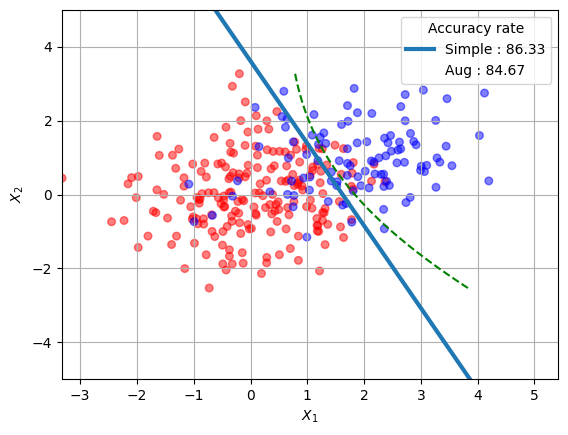

In [3]:
D3 = np.loadtxt(data_dir+'demo_data3.txt',comments='#')
s = 30 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D3[:,2]]
plt.scatter(D3[:, 0], D3[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
X = D3[:, 0:2]
y = D3[:, 2]
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat = Mdl.predict(X)
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
accuracy = np.mean(y_pre == y) * 100
plt.plot(x, f, lw=3,label='Simple : {:.2f}'.format(accuracy))

x1 = D3[:, 0:1] 
x2 = D3[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
f2 = (lambda x: intrcp
    + coeffs[0] * x[0]
    + coeffs[1] * x[1]
    + coeffs[2] * x[0] * x[1]
    + coeffs[3] * x[0] ** 2
    + coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X1, Y1 = np.meshgrid(xx, yy) #網格點
Z = f2([X1, Y1])
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀

contours = plt.contour(X1, Y1, Z, levels = [0.5], colors='g', linestyles='--')
contours.collections[0].set_label((\
        'Aug : {:.2f}'.format(100 * np.mean(y_pre == y))))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.ylim(-5,5)
plt.legend(title = "Accuracy rate")
plt.grid(True)
# plt.savefig("reg_experiment3.pdf")
# files.download("reg_experiment3.pdf")
plt.show()

# 實驗四 不同資料量 離很遠

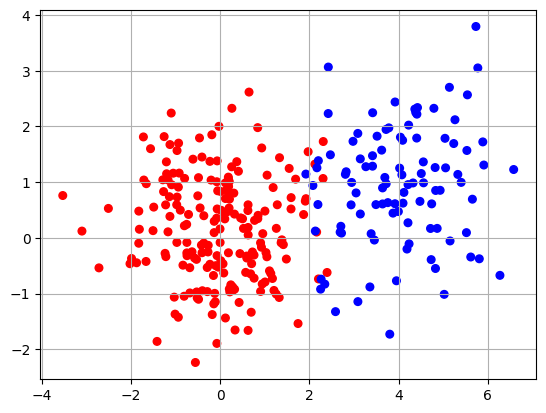

In [6]:
n1, n2 = 200, 100
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('demo_data4.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

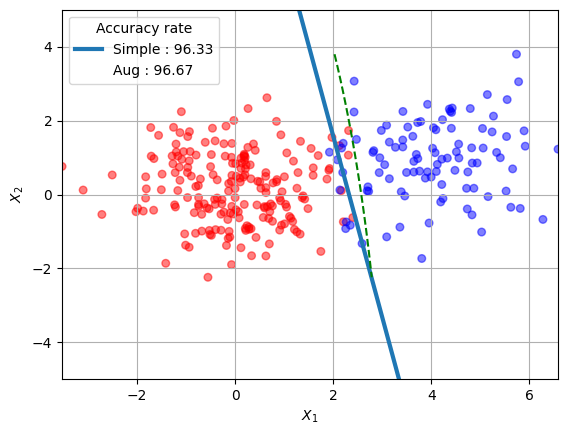

In [8]:
D4 = np.loadtxt(data_dir+'demo_data4.txt',comments='#')
s = 30 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D4[:,2]]
plt.scatter(D4[:, 0], D4[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
X = D4[:, 0:2]
y = D4[:, 2]
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat = Mdl.predict(X)
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
accuracy = np.mean(y_pre == y) * 100
plt.plot(x, f, lw=3,label='Simple : {:.2f}'.format(accuracy))

x1 = D4[:, 0:1] 
x2 = D4[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
f2 = (lambda x: intrcp
    + coeffs[0] * x[0]
    + coeffs[1] * x[1]
    + coeffs[2] * x[0] * x[1]
    + coeffs[3] * x[0] ** 2
    + coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X1, Y1 = np.meshgrid(xx, yy) #網格點
Z = f2([X1, Y1])
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀

contours = plt.contour(X1, Y1, Z, levels = [0.5], colors='g', linestyles='--')
contours.collections[0].set_label((\
        'Aug : {:.2f}'.format(100 * np.mean(y_pre == y))))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.ylim(-5,5)
plt.legend(title = "Accuracy rate")
plt.grid(True)
# plt.savefig("reg_experiment4.pdf")
# files.download("reg_experiment4.pdf")
plt.show()

# 實驗五 變異不同 距離遠

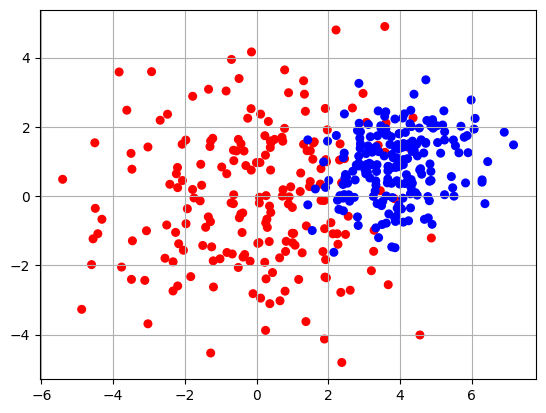

In [9]:
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[4, 0], [0, 4]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('demo_data5.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

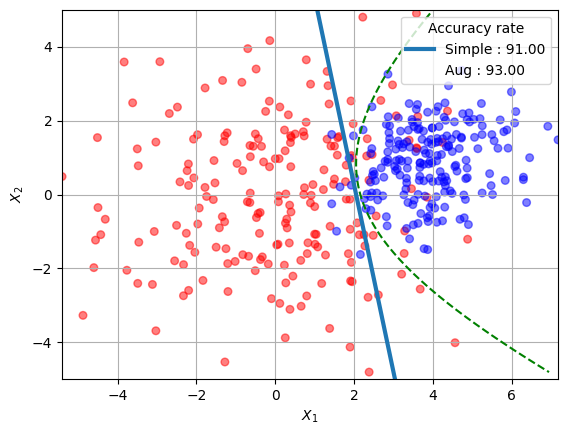

In [11]:
D5 = np.loadtxt(data_dir+'demo_data5.txt',comments='#')
s = 30 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D5[:,2]]
plt.scatter(D5[:, 0], D5[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
X = D5[:, 0:2]
y = D5[:, 2]
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat = Mdl.predict(X)
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
accuracy = np.mean(y_pre == y) * 100
plt.plot(x, f, lw=3,label='Simple : {:.2f}'.format(accuracy))

x1 = D5[:, 0:1] 
x2 = D5[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
f2 = (lambda x: intrcp
    + coeffs[0] * x[0]
    + coeffs[1] * x[1]
    + coeffs[2] * x[0] * x[1]
    + coeffs[3] * x[0] ** 2
    + coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X1, Y1 = np.meshgrid(xx, yy) #網格點
Z = f2([X1, Y1])
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀

contours = plt.contour(X1, Y1, Z, levels = [0.5], colors='g', linestyles='--')
contours.collections[0].set_label((\
        'Aug : {:.2f}'.format(100 * np.mean(y_pre == y))))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.ylim(-5,5)
plt.legend(title = "Accuracy rate")
plt.grid(True)
# plt.savefig("reg_experiment5.pdf")
# files.download("reg_experiment5.pdf")
plt.show()

# 實驗六 變異不同 資料近

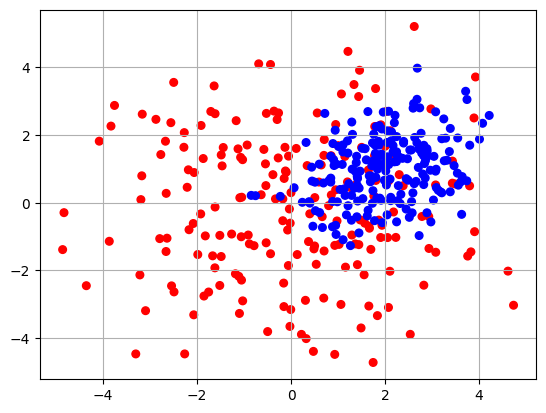

In [12]:
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[4, 0], [0, 4]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('demo_data6.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

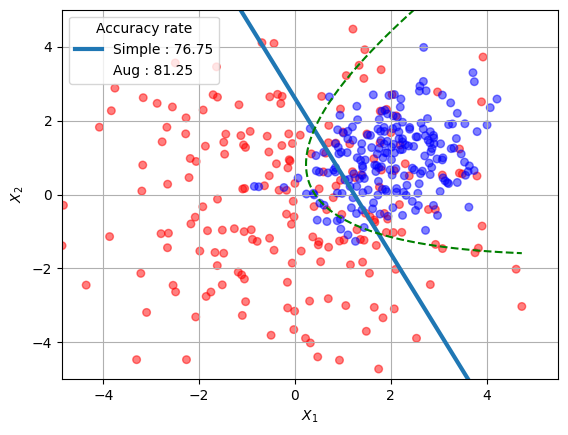

In [14]:
D6 = np.loadtxt(data_dir+'demo_data6.txt',comments='#')
s = 30 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D6[:,2]]
plt.scatter(D6[:, 0], D6[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
X = D6[:, 0:2]
y = D6[:, 2]
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat = Mdl.predict(X)
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
accuracy = np.mean(y_pre == y) * 100
plt.plot(x, f, lw=3,label='Simple : {:.2f}'.format(accuracy))

x1 = D6[:, 0:1] 
x2 = D6[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
f2 = (lambda x: intrcp
    + coeffs[0] * x[0]
    + coeffs[1] * x[1]
    + coeffs[2] * x[0] * x[1]
    + coeffs[3] * x[0] ** 2
    + coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X1, Y1 = np.meshgrid(xx, yy) #網格點
Z = f2([X1, Y1])
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀

contours = plt.contour(X1, Y1, Z, levels = [0.5], colors='g', linestyles='--')
contours.collections[0].set_label((\
        'Aug : {:.2f}'.format(100 * np.mean(y_pre == y))))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.ylim(-5,5)
plt.legend(title = "Accuracy rate")
plt.grid(True)
# plt.savefig("reg_experiment6.pdf")
# files.download("reg_experiment6.pdf")
plt.show()

# 實驗七 平均數一樣 變異不同 量一樣

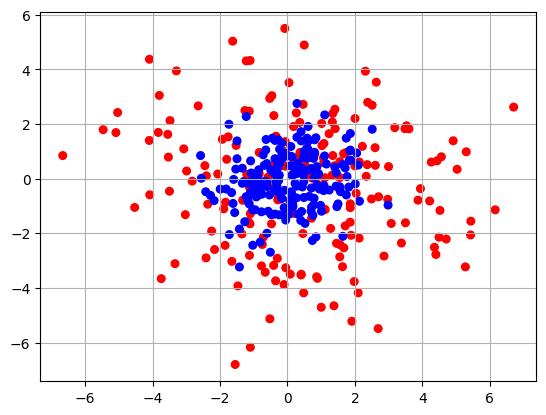

In [15]:
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([0, 0])
Cov1 = np.array([[6, 0], [0, 6]])
Cov2 = np.array([[1, 0], [0, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('demo_data7.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

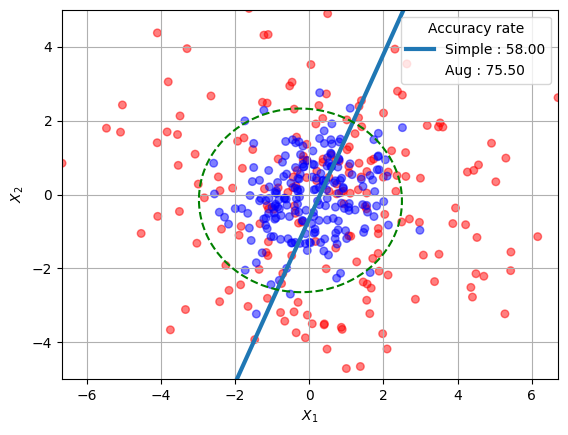

In [17]:
D7 = np.loadtxt(data_dir+'demo_data7.txt',comments='#')
s = 30 
colors = [[1,0,0] if i == 0 else [0,0,1] for i in D7[:,2]]
plt.scatter(D7[:, 0], D7[:, 1], c = colors, s = s, \
        marker = 'o', alpha = 0.5)
X = D7[:, 0:2]
y = D7[:, 2]
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat = Mdl.predict(X)
y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
accuracy = np.mean(y_pre == y) * 100
plt.plot(x, f, lw=3,label='Simple : {:.2f}'.format(accuracy))

x1 = D7[:, 0:1] 
x2 = D7[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
# Draw a regression line
f2 = (lambda x: intrcp
    + coeffs[0] * x[0]
    + coeffs[1] * x[1]
    + coeffs[2] * x[0] * x[1]
    + coeffs[3] * x[0] ** 2
    + coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x2.min(), x2.max(), 100)
X1, Y1 = np.meshgrid(xx, yy) #網格點
Z = f2([X1, Y1])
y_hat = Mdl.predict(X) # 預測或計算擬合值 
y_pre=[1 if i>0.5 else 0 for i in y_hat] # 群組判讀

contours = plt.contour(X1, Y1, Z, levels = [0.5], colors='g', linestyles='--')
contours.collections[0].set_label((\
        'Aug : {:.2f}'.format(100 * np.mean(y_pre == y))))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.ylim(-5,5)
plt.legend(title = "Accuracy rate")
plt.grid(True)
# plt.savefig("reg_experiment7.pdf")
# files.download("reg_experiment7.pdf")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([8, 2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('demo_data1.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.plot([4,4],[6,-3],linewidth=3,color='orange',linestyle='--')
plt.plot([7,2],[6,-3],linewidth=3,color='orange',linestyle='--')
plt.plot([3,7],[6,-3],linewidth=3,color='orange',linestyle='--')
plt.grid(True)
# plt.savefig("dividingline.pdf")
# files.download("dividingline.pdf")
plt.show()

# 三組資料

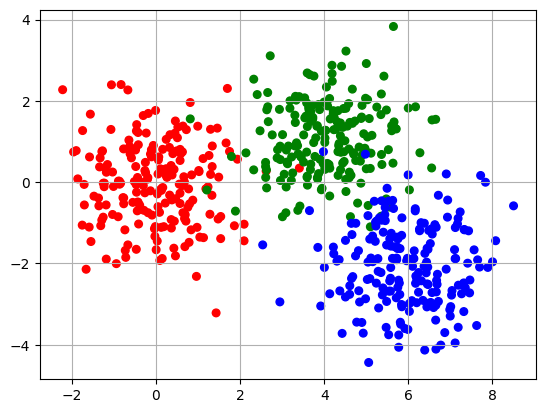

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2, n3 = 200, 200,200
m1, m2 ,m3= np.array([0, 0]), np.array([4, 1]), np.array([6, -2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B ,C= mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
X = np.vstack((A, B,C))
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n2)*2))
np.savetxt('logistic.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'green'if i==1 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

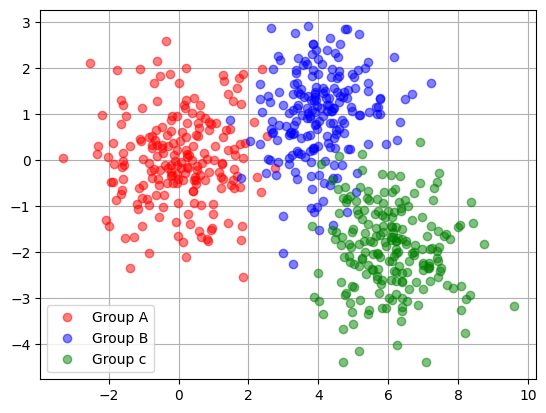

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
D8 = np.loadtxt(data_dir+'/logistic.txt',comments='#')
n1, n2, n3 = 200, 200,200
m1, m2 ,m3= np.array([0, 0]), np.array([4, 1]), np.array([6, -2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B ,C= mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
X = np.vstack((A, B,C))
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n2)*2))
# np.savetxt('logistic.txt', np.c_[X, y],\
#      fmt = "%.4f %.4f %d", header = "X1 X2 y")
Idx = (D8[:,2]==0)
plt.plot(D8[Idx, 0], D8[Idx, 1], 'ro',\
    alpha = 0.5, label = 'Group A')
Idx = (D8[:,2]==1)
plt.plot(D8[Idx,0], D8[Idx,1],'bo', \
    alpha = 0.5, label = 'Group B')
Idx = (D8[:,2]==2)
plt.plot(D8[Idx,0], D8[Idx,1],'go', \
    alpha = 0.5, label = 'Group c')
plt.grid(True)
plt.legend()
plt.savefig(img_dir+"three_data.pdf", format='pdf')
plt.show()

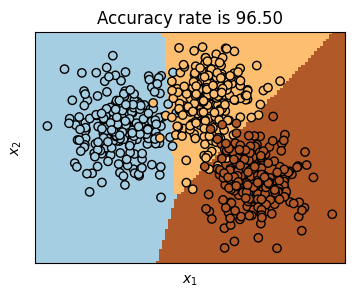

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
D1=np.loadtxt(data_dir+'/logistic.txt',comments='#')
X = D1[:, :2]  # we only take the first two features.
Y = D1[:,2]

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    # plot_method="contourf",
    shading="auto",
    xlabel="$x_1$",
    ylabel="$x_2$",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
score=logreg.score(X,Y)
plt.title('Accuracy rate is {:.2f}'.format(score*100) )

plt.xticks(())
plt.yticks(())
plt.savefig(img_dir+'logistic.pdf', format='pdf')
plt.show()